In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load the Data

In [5]:
data = pd.read_csv("../housing.csv")

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Clean NA values

In [7]:
data = data.fillna(data.mean())
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Z Scaling

In [8]:
z_scaler = lambda column: (column - column.mean())/ column.std()

In [9]:
numeric_columns = [column for column in data.columns][0:-1]
other_columns = [column for column in data.columns][-1]

In [10]:
scaled_data = pd.DataFrame()
scaled_data[numeric_columns] = data[numeric_columns].apply(z_scaler, axis=0)
scaled_data[other_columns] = data[other_columns]

In [11]:
scaled_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-1.429215e-12,-7.636681e-14,1.817399e-15,-9.590802e-17,-4.838160e-15,-2.836528e-16,7.563865e-17,-2.523810e-14,3.767873e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.385935e+00,-1.447533e+00,-2.196127e+00,-1.207254e+00,-1.280499e+00,-1.256092e+00,-1.303952e+00,-1.774256e+00,-1.662601e+00
25%,-1.113182e+00,-7.967694e-01,-8.453727e-01,-5.445566e-01,-5.745045e-01,-5.637952e-01,-5.742155e-01,-6.881019e-01,-7.561450e-01
50%,5.389006e-01,-6.422715e-01,2.864502e-02,-2.332048e-01,-2.382030e-01,-2.291262e-01,-2.368104e-01,-1.767908e-01,-2.353280e-01
75%,7.784775e-01,9.729330e-01,6.642943e-01,2.347971e-01,2.513423e-01,2.644885e-01,2.758360e-01,4.592952e-01,5.014851e-01
max,2.625216e+00,2.957996e+00,1.856137e+00,1.681517e+01,1.408920e+01,3.024960e+01,1.460117e+01,5.858144e+00,2.540349e+00


In [12]:
scaled_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327803,1.052523,0.982119,-0.804800,-0.975204,-0.974405,-0.977009,2.344709,2.129580,NEAR BAY
1,-1.322812,1.043159,-0.607004,2.045841,1.355055,0.861418,1.669921,2.332181,1.314124,NEAR BAY
2,-1.332794,1.038478,1.856137,-0.535733,-0.829712,-0.820757,-0.843616,1.782656,1.258663,NEAR BAY
3,-1.337785,1.038478,1.856137,-0.624199,-0.722382,-0.766010,-0.733764,0.932945,1.165072,NEAR BAY
4,-1.337785,1.038478,1.856137,-0.462393,-0.615052,-0.759828,-0.629142,-0.012881,1.172871,NEAR BAY


## Boxplots

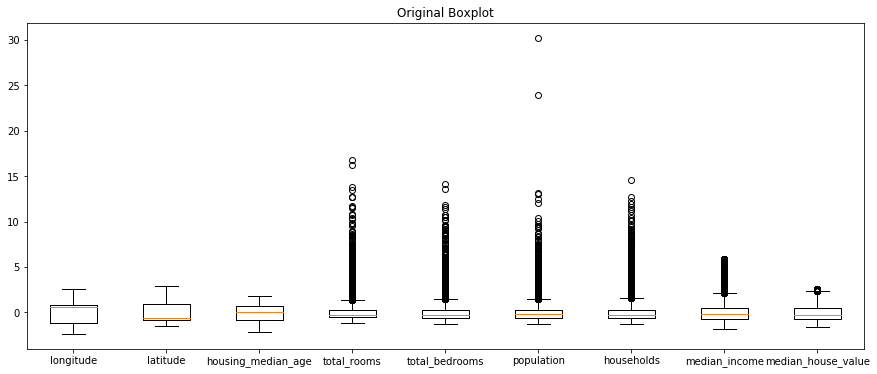

In [13]:
figure = plt.figure(figsize=(15, 6))
boxplot = plt.boxplot([scaled_data.iloc[:, i].values for i in range(0, len(numeric_columns))],
                     labels=numeric_columns)

title = plt.title("Original Boxplot")

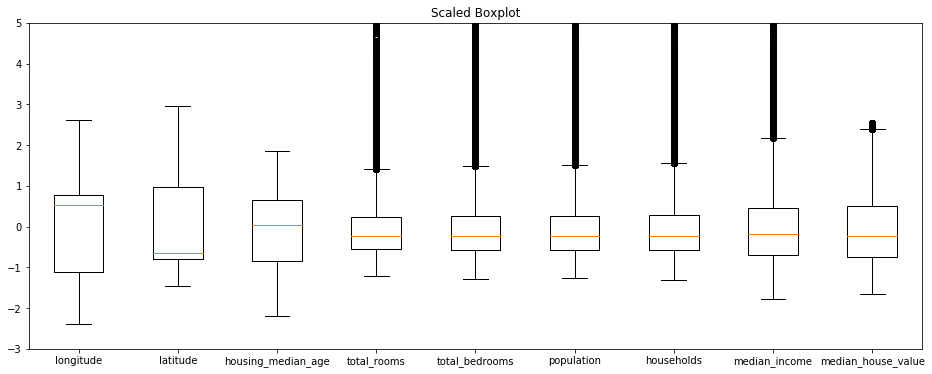

In [14]:
figure = plt.figure(figsize=(16, 6))
boxplot = plt.boxplot([scaled_data.iloc[:, i].values for i in range(0, len(numeric_columns))],
                     labels=numeric_columns)
title = plt.title("Scaled Boxplot")
ylim = plt.ylim([-3, 5])

## Histograms

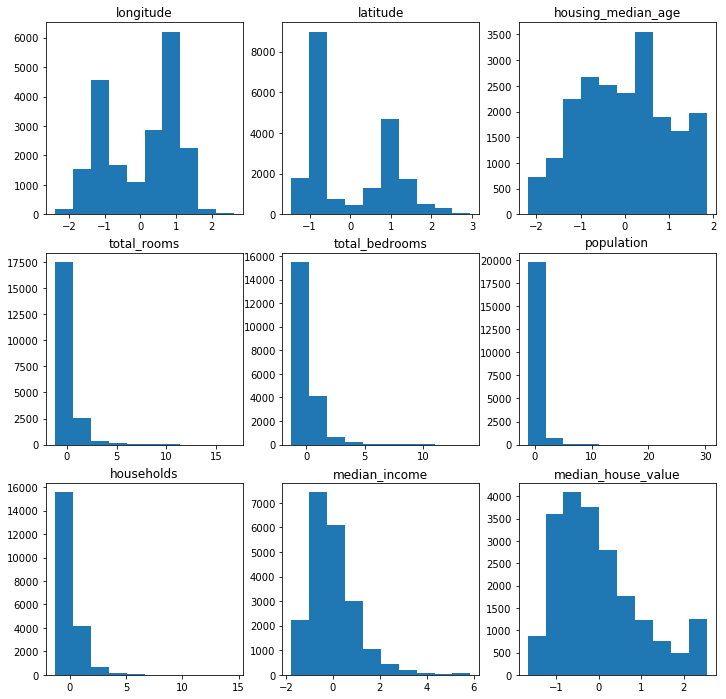

In [15]:
f, plots = plt.subplots(3,3, figsize=(12, 12))

for i in range(0,len(numeric_columns)):
    plots[int(i/3), i%3].hist(scaled_data.iloc[:, i].values)
    plots[int(i/3), i%3].set_title(numeric_columns[i])

## Scatterplots

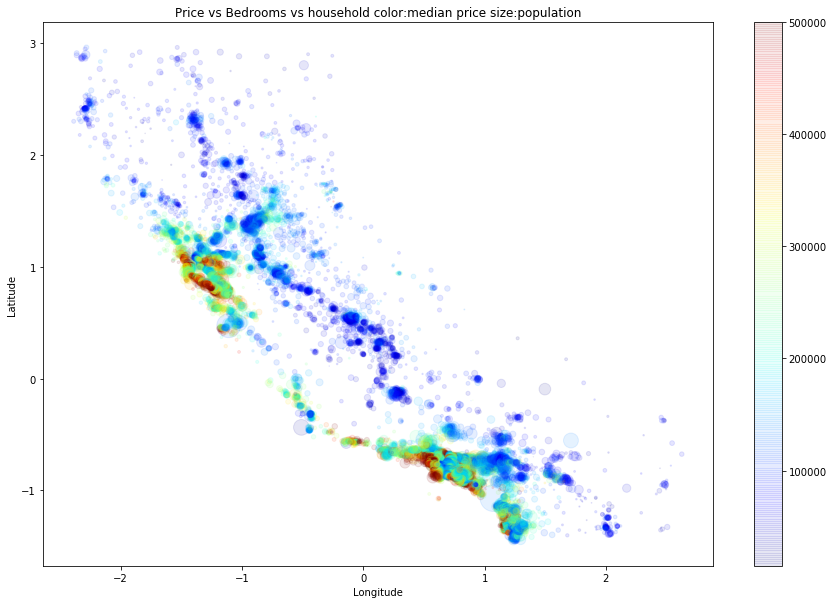

In [16]:
plt.figure(figsize=(15, 10))

plot = plt.scatter(scaled_data["longitude"], 
                   scaled_data["latitude"], 
                   c=data["median_house_value"],
                   s=data["population"]/50,
                   alpha=0.1,
                   cmap=plt.get_cmap("jet"))
colorbar = plt.colorbar()
xlabel = plt.xlabel("Longitude")
ylabel = plt.ylabel("Latitude")
title = plt.title("Price vs Bedrooms vs household color:median price size:population")

## Relation between Attributes

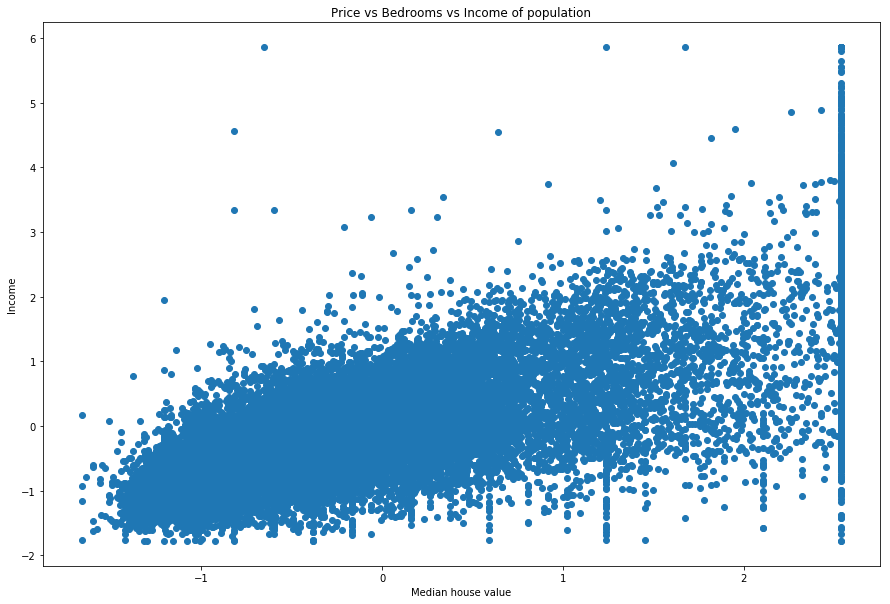

In [17]:
plt.figure(figsize=(15, 10))
plot = plt.scatter(scaled_data["median_house_value"], 
                   scaled_data["median_income"])
xlabel = plt.xlabel("Median house value")
ylabel = plt.ylabel("Income")
title = plt.title("Price vs Bedrooms vs Income of population")

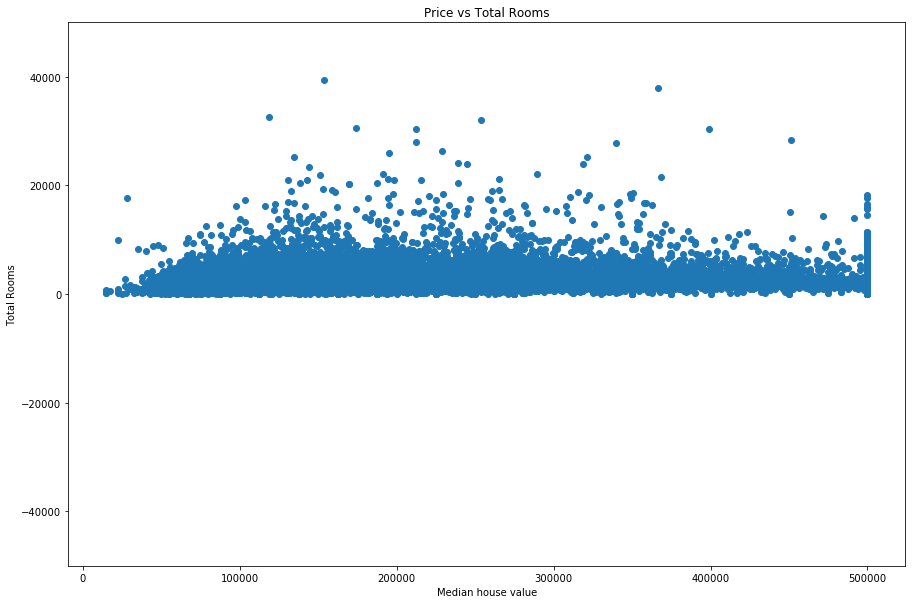

In [18]:
plt.figure(figsize=(15, 10))
plot = plt.scatter(data["median_house_value"], 
                   data["total_rooms"])
xlabel = plt.xlabel("Median house value")
ylabel = plt.ylabel("Total Rooms")
title = plt.title("Price vs Total Rooms")
ylim = plt.ylim([-50000, 50000])

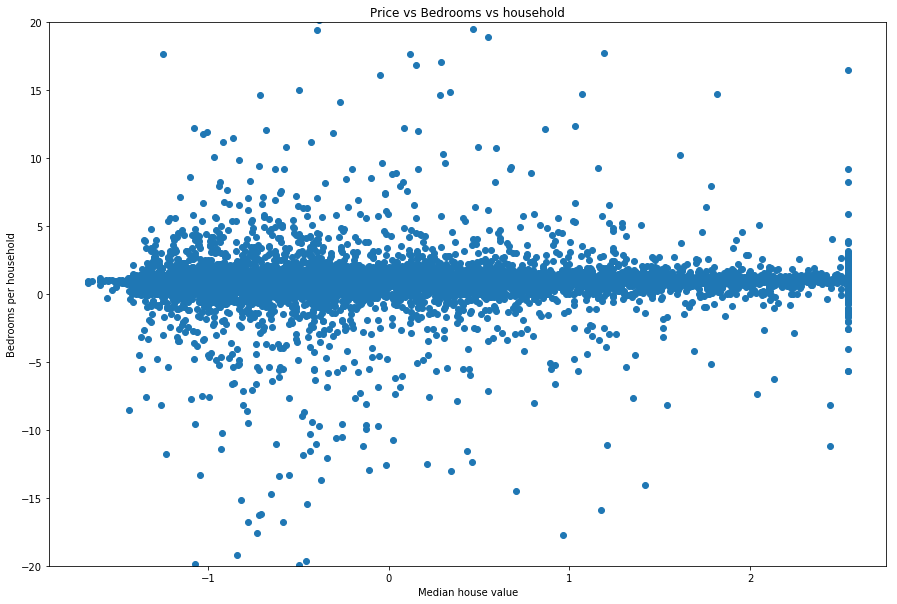

In [19]:
plt.figure(figsize=(15, 10))
plot = plt.scatter(scaled_data["median_house_value"], 
                   scaled_data["total_bedrooms"]/scaled_data["households"])
xlabel = plt.xlabel("Median house value")
ylabel = plt.ylabel("Bedrooms per household")
title = plt.title("Price vs Bedrooms vs household")
ylim = plt.ylim([-20, 20])